# Carga y limpieza de los datos climatológicos de la estación de Retiro

**Este notebook pertenece al Trabajo Fin de Grado del Curso de Adaptación al Grado de Ingeniería en Informática**


*Fecha:* Mayo 2022

*Autor:* Ruth Lospitao Ruiz


*Email:* rlospitao@gmail.com

## Introducción

Este libro, realiza una exploración y limpieza de los datos climatológicos de la estación de Retiro. Para ello, se cargarán los datos con el objetivo de:



*   ver las dimensiones del dataset
*   previsualizarlo
*   ver los datos estadíticos
*   analizar las variables categóricas y numéricas


*   tratar los no valores y valores atípicos (*outliers*)




El **objetivo** es: limpiar el conjunto de datos (dataset) lo máximo posible para utilizarlo, posteriormente, en un análisis predictivo.

## Importación de librerías y funciones

El primer paso, es importar las liberías necesarias:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import missingno as msno

import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

A continuación, se indican las funciones creadas y que se utilizarán en este notebook:

In [2]:
def display_all(df):
    ''' Imprime todos los datos que recibe
    '''
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [3]:
def correct_outlier (col):
    ''' Detección y corrección de valores atípicos por el método del rango intercuartil (IQR) 
    '''
    sorted(col)
    q1,q3=col.quantile([0.25, 0.75])
    IQR=q3-q1
    lower_range = q1-(1.5*IQR)
    upper_range= q3+ (1.5*IQR)
    return lower_range, upper_range

## Carga de los datos climatológicos

El siguiente paso, es importar los datos que se han extraído previamente (con el fichero "01b-extract_data_3195.ipynb") a un dataset (df):

In [4]:
df = pd.read_csv("data/data_3195.csv")  # Datos climatológicos

## Análisis exploratorio de los datos

A continuación, se explorarán los datos climatológicos para obtener más información. Para ello, se seguirán los siguientes pasos:


1.   Se realizará una **exploración de los datos**: se comenzará explorando información del propio dataset: nº filas, nº columnas, tipos de datos de las variables, mostrar los valores nan que tiene el dataset, etc.
2.   Se continuará **analizando las variables**:

*   Categóricas
*   Numéricas
*   Y, por último, se analizará la correlación existente entre las variables:



### Exploración de los datos



Se comienza mostrando el tamaño del dataset y la dimensión:

In [5]:
print('El tamaño del dataset es:', df.size, ".\nTiene: ", df.shape[0], " filas y ", df.shape[1], " columnas.")


El tamaño del dataset es: 59085 .
Tiene:  1313  filas y  45  columnas.


A continuación, se previsualizan las primeras 50 filas. Con .head() se verifica que los datos se han cargado correctamente en el dataframe

In [6]:
df.head(50)

,fecha,indicativo,p_max,n_cub,hr,n_gra,n_fog,inso,q_max,q_mar,...,q_min,np_010,nw_55,w_racha,nw_91,w_rec,w_med,ts_20,ts_10,ts_50
0,1920-1,3195,1.4(03),5.0,79.0,0.0,5.0,5.0,959.7(16),1025.4,...,922.7(04),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1920-2,3195,26.2(19),13.0,75.0,0.0,1.0,4.9,960.6(02),1024.7,...,923.9(20),10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1920-3,3195,8.2(07),7.0,NaN,1.0,0.0,6.8,951.9(03),1021.5,...,918.7(15),6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1920-4,3195,9.2(08),9.0,60.0,1.0,0.0,7.4,950.3(21),1015.9,...,927.0(12),6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1920-5,3195,38.4(13),7.0,58.0,1.0,1.0,9.2,954.5(05),1015.8,...,931.8(23),5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1920-6,3195,13.9(27),5.0,51.0,0.0,0.0,9.6,947.0(22),1014.4,...,930.9(06),2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1920-7,3195,6.2(20),1.0,39.0,1.0,0.0,11.9,947.9(28),1014.7,...,935.7(31),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1920-8,3195,1.0(02),0.0,NaN,0.0,0.0,11.5,947.7(16),1014.5,...,934.6(19),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1920-9,3195,2.7(11),3.0,55.0,0.0,0.0,8.9,948.2(25),1017.5,...,933.4(20),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1920-10,3195,15.9(24),16.0,84.0,0.0,3.0,3.2,946.3(22),1015.7,...,927.1(31),13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En esta primera visualización, se puede comprobar que los datos se han cargado correctamente. Además, se aprovecha para observar por primera vez la información que se muestra. Por ejemplo, se observa que:
* La fecha, viene dada por el año seguido de un guíón y el número de mes. Se aprecia que existe una fila para un mes 13.
* Existen variables que tienen datos entre paréntesis
* Existen valores no nulos

Se continúa mostrando el nombre de las columnas (las variables) que tiene el dataset:

In [7]:
col_names = df.columns
print("El dataset tiene las siguientes variables: ")
col_names

El dataset tiene las siguientes variables: 


Index(['fecha', 'indicativo', 'p_max', 'n_cub', 'hr', 'n_gra', 'n_fog', 'inso',
       'q_max', 'q_mar', 'q_med', 'tm_min', 'ta_max', 'ts_min', 'nt_30',
       'nv_0050', 'n_des', 'np_100', 'n_nub', 'p_sol', 'np_001', 'ta_min', 'e',
       'np_300', 'nv_1000', 'evap', 'p_mes', 'n_llu', 'n_tor', 'nt_00',
       'ti_max', 'n_nie', 'tm_mes', 'tm_max', 'nv_0100', 'q_min', 'np_010',
       'nw_55', 'w_racha', 'nw_91', 'w_rec', 'w_med', 'ts_20', 'ts_10',
       'ts_50'],
      dtype='object')

A continuación, se explica qué información contiene cada una de estas variables; la cual, se ha obtenido consultando los metadatos de la página web de OpenData AEMET:


* *fecha*: ano y mes (AAAA-X) donde X es un número de 1 a 13, indicando el mes y el valor 13 indica valor anual.
* *indicativo*: identificador de la estación climatológica
* *p_max*: Precipitación máxima diaria (mm). Viene especificada en unidades mm (dia o fecha)
* *n_cub*: Nº de días cubiertos en el mes/año. Viene especificada como nº días
* *hr*: Humedad relativa media mensual/anual. Viene especificada en %
* *n_gra*: Nº de días de granizo en el mes/año. Viene especificada como nº días
* *n_fog*: Nº de días de niebla en el mes/año. Viene especificada como nº días
* *inso*: Media mensual/anual de la insolación diaria (horas). Viene especificada como nº días
* *q_max*: Presión máxima absoluta mensual/anual y fecha (hPa). Viene especificada como hPa
* *q_mar*: Presión media mensual/anual al nivel del mar (hPa). Viene especificada como hPa
* *q_med*: Presión media mensual/anual al nivel de la estación (hPa). Viene especificada como hPa
* *tm_min*: Temperatura media mensual/anual de las mínimas. Viene especificada en grados celsius
* *ta_max*: Temperatura máxima absoluta del mes/año y fecha. Viene especificada en grados celsius
* *ts_min*: Temperatura mínima mas alta del mes/año. Viene especificada en grados celsius 
* *nt_30*: Nº de días de temperatura máxima mayor o igual que 30grados celsius. Viene especificado en número de días
* *nv_0050*: Nº de días con visibilidad inferior a 50 m. en el mes/año. Viene especificado en número de días
* *n_des*: Nº de días despejados en el mes/año. Viene especificado en número de días
* *np_100*: Nº de días de precipitación mayor o igual que 10mm en el mes/año. Viene especificado en número de días
* *n_nub*: Nº de días nubosos en el mes/año. Viene especificado en número de días
* *p_sol*: Porcentaje medio mensual de la insolación diaria frente a la insolación teórica.Viene especificada en %
* *np_001*: Nº de días de precipitación apreciable (>= 0,1 mm). Viene especificado en número de días
* *ta_min*: Temperatura mínima absoluta del mes/año y fecha. Viene especificada en grados celsius
* e: Tensión de vapor media mensual/anual. Viene especificada en décimas hPa
* *np_300*: Nº de días de precipitación mayor o igual que 30mm en el mes/año. Viene especificado en número de días
* *nv_1000*: Nº de días con visibilidad superior o igual a 100 m. e inferior a 1 km. Viene especificado en número de días
* *evap*: Evaporación total mensual/anual. Viene especificado en décimas de mm
* *p_mes*: Precipitación total mensual/anual. Viene especificada en mm
* *n_llu*: Nº de días de lluvia en el mes/año. Viene especificado en número de días
* *n_tor*: Nº de días de tormenta en el mes/año. Viene especificado en número de días
* *ti_max*: Temperatura máxima mas baja del mes/año. Viene especificada en grados celsius 
* *n_nie*: Nº de días de nieve en el mes/año. Viene especificado en número de días
* *tm_mes*: Temperatura media mensual/anual. Viene especificada en grados celsius
* *tm_max*: Temperatura media mensual/anual de las máximas. Viene especificada en grados celsius
* *nv_0100*: Nº de días con visibilidad superior o igual a 50 m. e inferior a 100 m. Viene especificado en nº de días
* *q_min*: Presión máxima mínima mensual/anual y fecha. Viene especificado en hPa
* *np_010*: Nº de días de precipitación mayor o igual que 1mm en el mes/año. Viene especificado en número de días
* *nw_55*: Nº de días de velocidad del viento mayor o igual a 55 Km/h en el mes/año.Viene especificado en número de días
* *w_racha*: Dirección, Velocidad y fecha de la racha máxima en el mes/año. Viene especificado decenas de grado/ m/sg /fech
* *nw_91*: Nº de días de velocidad del viento mayor o igual a 91 Km/h en el mes/año. Viene especificado en número de días
* *w_rec*: Recorrido medio diario (de 07 a 07 UTC) del mes/año. Viene en Km
* *w_med*: Velocidad media mensual elaborada a partir de las observaciones de 07, 13 y 18 UTC. Viene en Km/h
* *ts_10*: Temperatura media mensual/anual a 10 cm de profundidad.
* *ts_20*: Temperatura media mensual/anual a 20 cm de profundidad.
* *ts_50*: Temperatura media mensual/anual a 50 cm de profundidad.
 





Como se ha mencionado, el dataset incluye una fila para un mes 13. Tal y como indican los metadatos esta fila contiene información anual. Al no ser necesaria para este estudio, ee procederá a eliminar todas las filas que tengan el año seguido del mes con el valor 13.


In [8]:
df[['anio','mes']] = df["fecha"].str.split('\-|\)', expand=True).iloc[:,[0,1]]
df = df.drop(columns=["fecha"], axis=1)
indexNames = df[ df['mes'] == '13' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df['fecha'] = df["anio"].str.cat(df["mes"], sep="-")
df = df.drop(columns=["anio", "mes"], axis=1)
print("Las filas con los valores anuales se han eliminado correctamente")
print ("Ahora el dataset tiene: ", df.shape[0], " filas y ", df.shape[1], " columnas.")



Las filas con los valores anuales se han eliminado correctamente
Ahora el dataset tiene:  1212  filas y  45  columnas.


A continuación, se muestra un resumen del dataset para comprobar la cantidad de valores no nulos y tipo de dato que tiene cada variable.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1311
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   indicativo  1212 non-null   int64  
 1   p_max       1182 non-null   object 
 2   n_cub       1100 non-null   float64
 3   hr          1044 non-null   float64
 4   n_gra       1096 non-null   float64
 5   n_fog       1182 non-null   float64
 6   inso        923 non-null    float64
 7   q_max       1150 non-null   object 
 8   q_mar       1150 non-null   float64
 9   q_med       1178 non-null   float64
 10  tm_min      1205 non-null   float64
 11  ta_max      1205 non-null   object 
 12  ts_min      1205 non-null   float64
 13  nt_30       1205 non-null   float64
 14  nv_0050     1035 non-null   float64
 15  n_des       1100 non-null   float64
 16  np_100      1182 non-null   float64
 17  n_nub       1100 non-null   float64
 18  p_sol       923 non-null    float64
 19  np_001      1182 non-null  

Se puede observar que todas las variables, excepto la variable fecha, tienen valores NaN. Más adelante, se abordará cómo solucionar esta situación.

Se continúa, mostrando la información estadística de las variables numéricas del dataset. Para visualizar todas las variables, se utilizará la función previamente definida `display_all`:

In [10]:
display_all(df.describe())

,indicativo,n_cub,hr,n_gra,n_fog,inso,q_mar,q_med,tm_min,ts_min,nt_30,nv_0050,n_des,np_100,n_nub,p_sol,np_001,e,np_300,nv_1000,evap,p_mes,n_llu,n_tor,nt_00,ti_max,n_nie,tm_mes,tm_max,nv_0100,np_010,nw_55,nw_91,w_rec,w_med,ts_20,ts_10,ts_50
count,1212.0,1100.00000,1044.000000,1096.000000,1182.000000,923.000000,1150.000000,1178.000000,1205.000000,1205.000000,1205.000000,1035.000000,1100.000000,1182.000000,1100.000000,923.000000,1182.000000,1136.000000,1182.000000,1035.000000,1059.000000,1209.000000,1096.000000,1182.000000,1205.000000,1205.000000,1096.000000,1205.000000,1205.000000,1035.000000,1182.000000,896.000000,896.000000,866.000000,1036.000000,2.000000,2.000000,2.000000
mean,3195.0,6.55000,58.120690,0.218066,2.331641,7.694908,1017.327217,940.794312,9.497759,14.375851,4.744398,0.614493,8.748182,1.111675,15.013636,61.302275,7.632826,97.392606,0.065990,1.109179,903.729934,36.165343,8.187956,1.010152,1.870539,12.701743,0.343066,14.482905,19.434855,0.009662,5.190355,2.255580,0.025670,201.360277,8.366795,16.700000,17.350000,16.450000
std,0.0,4.77713,13.681937,0.557950,3.983241,2.741618,4.163658,3.187690,5.864503,5.665037,8.137894,3.336566,5.542231,1.396518,4.056560,15.056534,5.075605,25.609519,0.261651,2.468107,549.508874,33.278919,5.190726,1.602252,4.044992,7.341033,0.925048,6.832350,7.872125,0.131585,3.873986,2.578049,0.178164,41.414242,3.031018,12.020815,13.222897,9.545942
min,3195.0,0.00000,28.000000,0.000000,0.000000,1.400000,1006.900000,928.900000,-2.600000,3.600000,0.000000,0.000000,0.000000,0.000000,4.000000,15.000000,0.000000,37.000000,0.000000,0.000000,83.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,1.900000,5.600000,0.000000,0.000000,0.000000,0.000000,69.000000,1.000000,8.200000,8.000000,9.700000
25%,3195.0,3.00000,47.000000,0.000000,0.000000,5.500000,1014.400000,938.900000,4.600000,9.600000,0.000000,0.000000,4.000000,0.000000,12.000000,51.000000,4.000000,76.000000,0.000000,0.000000,433.000000,10.300000,4.000000,0.000000,0.000000,6.700000,0.000000,8.300000,12.100000,0.000000,2.000000,0.000000,0.000000,175.000000,6.000000,12.450000,12.675000,13.075000
50%,3195.0,6.00000,58.000000,0.000000,0.000000,7.400000,1016.200000,940.700000,8.700000,13.600000,0.000000,0.000000,8.000000,1.000000,15.000000,62.000000,7.000000,95.000000,0.000000,0.000000,781.000000,27.900000,7.000000,0.000000,0.000000,11.400000,0.000000,13.700000,18.600000,0.000000,4.000000,1.000000,0.000000,201.000000,8.000000,16.700000,17.350000,16.450000
75%,3195.0,10.00000,69.000000,0.000000,3.000000,10.000000,1019.700000,942.400000,14.900000,19.600000,7.000000,0.000000,12.000000,2.000000,18.000000,73.000000,11.000000,117.000000,0.000000,1.000000,1278.000000,53.500000,12.000000,2.000000,2.000000,18.400000,0.000000,20.700000,26.500000,0.000000,8.000000,3.000000,0.000000,223.750000,10.000000,20.950000,22.025000,19.825000
max,3195.0,22.00000,88.000000,6.000000,27.000000,13.600000,1035.500000,955.300000,22.900000,25.900000,31.000000,31.000000,26.000000,7.000000,26.000000,92.000000,26.000000,176.000000,2.000000,17.000000,2578.000000,198.400000,28.000000,11.000000,25.000000,31.200000,8.000000,29.800000,36.600000,3.000000,19.000000,16.000000,3.000000,372.000000,20.000000,25.200000,26.700000,23.200000


<b>Resumen de lo explorado hasta el momento:</b>

* El dataset tiene 1224 filas y 45 variables.
* De las 45 variables, 7 son variables categóricas (tipo Object) y el resto son numéricas (tipos int64 y float64)
* Además, el dataset tiene un gran número de valores nulos. 


<b>Valores Nulos (NaN)</b>

A continuación, se muestra gráficamente los valores nulos (NaN) que tiene el dataset; los cuales aparecen en la siguiente figura de color azul oscuro:

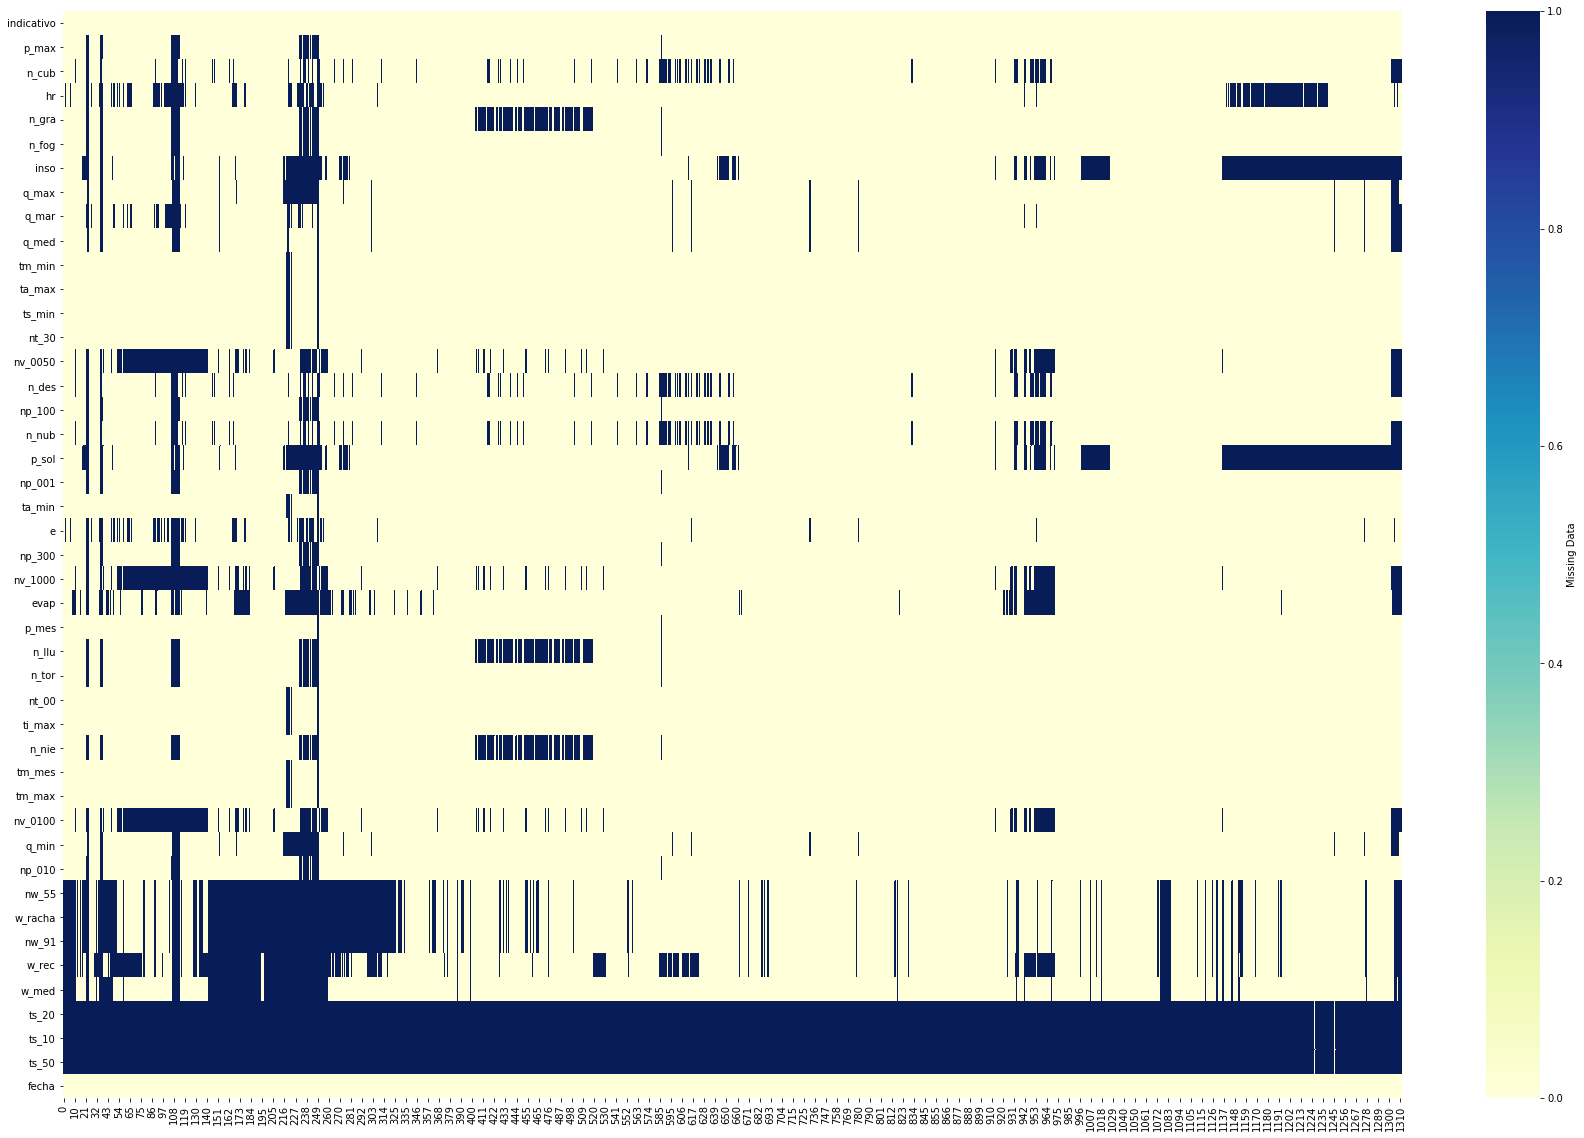

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

Otra forma de visualizar los valores NaN es con un gráfico de barras, en el que en la parte superior nos aparece el número de valores que tiene. Como se puede observar en la siguiente figura la variable "fecha" tiene valores para todas las observaciones. Sin embargo, la variables "ts_10", "ts_20" o "ts_50" solo tienen dos valores.

ERROR: Invalid requirement: '#se'


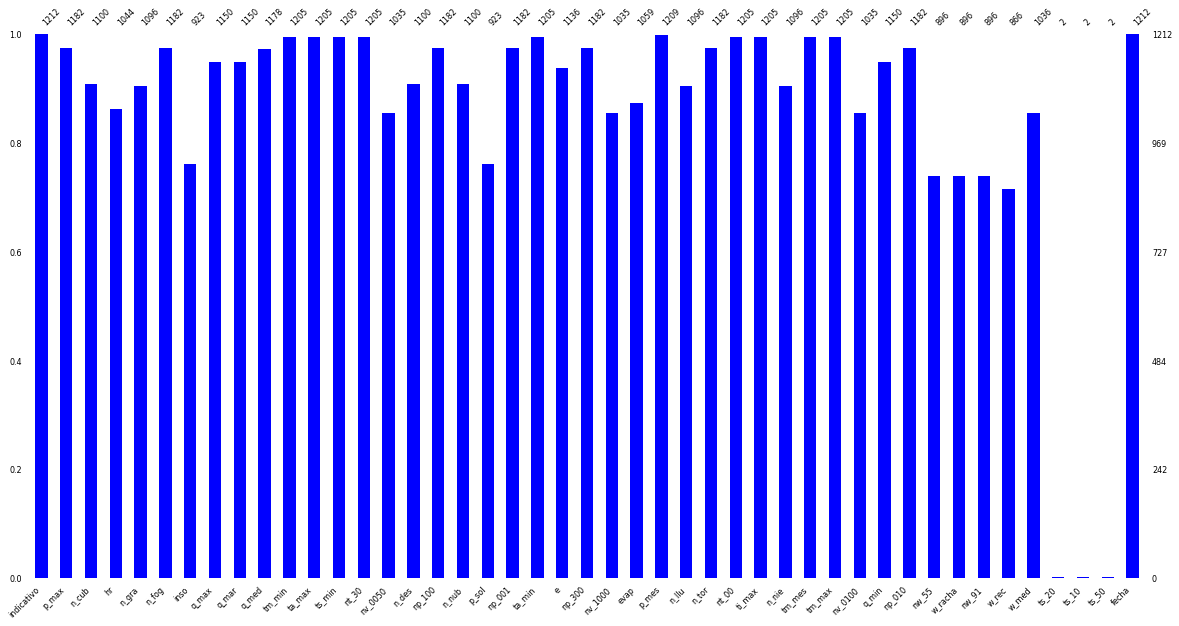

In [12]:
!pip install missingno #se instala paquete missingo, ya que no viene en Google Collaborate
msno.bar(df, figsize=(20,10), fontsize=8, color='blue')

Se eliminan las columnas “ts_10”, “ts_20” y “ts_50” porque tienen un gran número de valores nulos. Así mismo, también se elimina la columna “indicativo” que corresponde al valor 3195 de la estación de Retiro.

In [13]:
df = df.drop(columns=["ts_20", "ts_10", "ts_50", "indicativo"], axis=1)

Reordenamos las columnas, para mostrar en primer lugar las variables que más nos interesan como son la "fecha", "p_max","p_mes", etc.

In [14]:
cols = df.columns.tolist()
print(cols)

['p_max', 'n_cub', 'hr', 'n_gra', 'n_fog', 'inso', 'q_max', 'q_mar', 'q_med', 'tm_min', 'ta_max', 'ts_min', 'nt_30', 'nv_0050', 'n_des', 'np_100', 'n_nub', 'p_sol', 'np_001', 'ta_min', 'e', 'np_300', 'nv_1000', 'evap', 'p_mes', 'n_llu', 'n_tor', 'nt_00', 'ti_max', 'n_nie', 'tm_mes', 'tm_max', 'nv_0100', 'q_min', 'np_010', 'nw_55', 'w_racha', 'nw_91', 'w_rec', 'w_med', 'fecha']


In [15]:
cols = ['fecha','p_max', 'p_mes','n_llu', 'n_tor', 'np_100', 'n_cub', 'hr', 'n_gra', 'n_fog', 'inso',
     'q_max', 'q_mar', 'q_med', 'tm_min', 'ta_max', 'ts_min', 'nt_30', 'nv_0050', 'n_des', 'n_nub',
     'p_sol', 'np_001', 'ta_min', 'e', 'np_300', 'nv_1000', 'evap', 'nt_00', 'ti_max', 'n_nie', 'tm_mes',
     'tm_max', 'nv_0100', 'q_min', 'np_010', 'nw_55', 'w_racha', 'nw_91', 'w_rec', 'w_med']

df = df[cols]

Por último, después de las modificaciones anteriores, se vuelve a mostrar la información del dataset:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1311
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fecha    1212 non-null   object 
 1   p_max    1182 non-null   object 
 2   p_mes    1209 non-null   float64
 3   n_llu    1096 non-null   float64
 4   n_tor    1182 non-null   float64
 5   np_100   1182 non-null   float64
 6   n_cub    1100 non-null   float64
 7   hr       1044 non-null   float64
 8   n_gra    1096 non-null   float64
 9   n_fog    1182 non-null   float64
 10  inso     923 non-null    float64
 11  q_max    1150 non-null   object 
 12  q_mar    1150 non-null   float64
 13  q_med    1178 non-null   float64
 14  tm_min   1205 non-null   float64
 15  ta_max   1205 non-null   object 
 16  ts_min   1205 non-null   float64
 17  nt_30    1205 non-null   float64
 18  nv_0050  1035 non-null   float64
 19  n_des    1100 non-null   float64
 20  n_nub    1100 non-null   float64
 21  p_sol    923 n

Como <b>resumen final de este primer análisis exploratorio</b>, se puede concluir que el dataset está formado por:

  * Un total de 41 columnas, donde todas las variables son de tipo float64 excepto las variables “fecha”, “p_max”, “q_max”, “ta_max”, “ta_min”, “q_min” y “w_racha” que son de tipo Object. Más adelante se deberán analizar qué tipo de información contienen estas variables.
  * Un  total de 1224 filas, en las que únicamente el campo “fecha” no tiene valores nulos. Este campo es muy importante que tenga valor, ya que se trabaja con una serie temporal. Sin embargo, el resto de las variables tienen un gran número de valores nulos.

En consecuencia, el siguiente apartado tratará de analizar la información de las distintas variables y cómo afrontar los valores nulos y atípicos.


### Exploración de variables

##### <b>Variables categóricas</b>

A continuación, se analizarán qué variables son categóricas del dataset. Es importante analizarlo, ya que en un futuro para el algoritmo se necesitarán variables numéricas. 

In [17]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Hay {} variable(s) tipo objecto'.format(len(categorical)), categorical)

Hay 7 variable(s) tipo objecto ['fecha', 'p_max', 'q_max', 'ta_max', 'ta_min', 'q_min', 'w_racha']


Se muestran las primeras 15 filas, para observar la información que contiene:



In [18]:
df[categorical].head(15)

,fecha,p_max,q_max,ta_max,ta_min,q_min,w_racha
0,1920-1,1.4(03),959.7(16),14.6(22),-1.6(08),922.7(04),NaN
1,1920-2,26.2(19),960.6(02),15.8(29),-2.9(11),923.9(20),NaN
2,1920-3,8.2(07),951.9(03),22.8(23),-1.8(11),918.7(15),NaN
3,1920-4,9.2(08),950.3(21),25.6(28),3.2(22),927.0(12),NaN
4,1920-5,38.4(13),954.5(05),32.0(09),4.0(05),931.8(23),NaN
5,1920-6,13.9(27),947.0(22),36.6(23),9.1(17),930.9(06),NaN
6,1920-7,6.2(20),947.9(28),34.8(31),12.5(28),935.7(31),NaN
7,1920-8,1.0(02),947.7(16),35.3(12),13.0(15),934.6(19),NaN
8,1920-9,2.7(11),948.2(25),32.0(07),6.2(24),933.4(20),NaN
9,1920-10,15.9(24),946.3(22),19.9(04),4.0(31),927.1(31),NaN


Como se ha podido observar: 
* las variables climatológicas, contienen datos entre paréntesis (correspondientes al día de la medida)
* será necesario cambiar el tipo de estas variables de tipo objecto a tipo numérico para poder trabajar con ellas más adelante

Se comienza eliminando la información contenida entre paréntesis; ya que, para el objetivo de este trabajo, no es necesaria. Únicamente se quedará el valor de medida.

In [19]:
df[['p_max','dia_p_max']] = df["p_max"].str.split('\(|\)', expand=True).iloc[:,[0,1]]
df[['q_min','dia_q_min']] = df["q_min"].str.split('\(|\)', expand=True).iloc[:,[0,1]]
df[['q_max','dia_q_max']] = df["q_max"].str.split('\(|\)', expand=True).iloc[:,[0,1]]
df[['ta_max','dia_ta_max']] = df["ta_max"].str.split('\(|\)', expand=True).iloc[:,[0,1]]
df[['ta_min','dia_ta_min']] = df["ta_min"].str.split('\(|\)', expand=True).iloc[:,[0,1]]
#se eliminan los días de cada variable meteorológica porque no son necesarias para este trabajo
df = df.drop(columns=["dia_p_max", "dia_q_min", "dia_q_max", "dia_ta_max", "dia_ta_min"], axis=1)

df.head(15)

,fecha,p_max,p_mes,n_llu,n_tor,np_100,n_cub,hr,n_gra,n_fog,...,tm_mes,tm_max,nv_0100,q_min,np_010,nw_55,w_racha,nw_91,w_rec,w_med
0,1920-1,1.4,2.8,4.0,0.0,0.0,5.0,79.0,0.0,5.0,...,6.2,10.3,0.0,922.7,1.0,NaN,NaN,NaN,NaN,NaN
1,1920-2,26.2,89.4,12.0,1.0,3.0,13.0,75.0,0.0,1.0,...,7.8,11.9,0.0,923.9,10.0,NaN,NaN,NaN,NaN,NaN
2,1920-3,8.2,30.1,9.0,0.0,0.0,7.0,NaN,1.0,0.0,...,10.0,14.9,0.0,918.7,6.0,NaN,NaN,NaN,NaN,NaN
3,1920-4,9.2,26.3,12.0,1.0,0.0,9.0,60.0,1.0,0.0,...,13.3,18.9,0.0,927.0,6.0,NaN,NaN,NaN,NaN,NaN
4,1920-5,38.4,75.3,10.0,1.0,2.0,7.0,58.0,1.0,1.0,...,18.5,25.0,0.0,931.8,5.0,NaN,NaN,NaN,NaN,NaN
5,1920-6,13.9,15.8,7.0,3.0,1.0,5.0,51.0,0.0,0.0,...,21.2,27.4,0.0,930.9,2.0,NaN,NaN,NaN,NaN,NaN
6,1920-7,6.2,6.2,2.0,1.0,0.0,1.0,39.0,1.0,0.0,...,23.8,31.1,0.0,935.7,1.0,NaN,NaN,NaN,NaN,NaN
7,1920-8,1.0,1.3,2.0,0.0,0.0,0.0,NaN,0.0,0.0,...,24.0,31.1,0.0,934.6,1.0,NaN,NaN,NaN,NaN,NaN
8,1920-9,2.7,3.6,8.0,0.0,0.0,3.0,55.0,0.0,0.0,...,19.4,25.4,0.0,933.4,1.0,NaN,NaN,NaN,NaN,NaN
9,1920-10,15.9,86.9,20.0,0.0,4.0,16.0,84.0,0.0,3.0,...,12.2,16.0,0.0,927.1,13.0,NaN,NaN,NaN,NaN,NaN


La variable `w_racha`, correspondiente a la dirección, velocidad y fecha no será necesaria para el estudio, por lo que se procede a eliminar

In [20]:
df = df.drop(columns=["w_racha"], axis=1)

Se vuelve a mostrar la información del dataset para las variables modificadas:

In [21]:
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].head(15)

,fecha,p_max,q_max,ta_max,ta_min,q_min
0,1920-1,1.4,959.7,14.6,-1.6,922.7
1,1920-2,26.2,960.6,15.8,-2.9,923.9
2,1920-3,8.2,951.9,22.8,-1.8,918.7
3,1920-4,9.2,950.3,25.6,3.2,927.0
4,1920-5,38.4,954.5,32.0,4.0,931.8
5,1920-6,13.9,947.0,36.6,9.1,930.9
6,1920-7,6.2,947.9,34.8,12.5,935.7
7,1920-8,1.0,947.7,35.3,13.0,934.6
8,1920-9,2.7,948.2,32.0,6.2,933.4
9,1920-10,15.9,946.3,19.9,4.0,927.1


Una vez que las variables tienen únicamente información meteorológica, se procede a seleccionar las variables tipo objeto excepto la fecha para convertirlas a tipo float:

In [22]:
print ("Las variables objeto son: ", df.select_dtypes(include="object").columns)

Las variables objeto son:  Index(['fecha', 'p_max', 'q_max', 'ta_max', 'ta_min', 'q_min'], dtype='object')


In [23]:
correct_cols = df.select_dtypes("object").columns[1:].tolist() # se seleccionan todas excepto la primera que es fecha
print ("Las columnas a modificar a tipo numérico son: ", correct_cols)


Las columnas a modificar a tipo numérico son:  ['p_max', 'q_max', 'ta_max', 'ta_min', 'q_min']


In [24]:
for col in range(len(correct_cols)): 
    df[correct_cols[col]] = df[correct_cols[col]].astype("float64")
print ("Las variables Object se han convertido a float")

Las variables Object se han convertido a float


Una vez que se han casteado las variables indicadas, únicamente tenemos la variable <i>fecha</i> como tipo objecto:

In [25]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Hay {} variable(s) objecto'.format(len(categorical)), categorical)

Hay 1 variable(s) objecto ['fecha']


**Exploración de la variable <i>fecha</i>** 

A continuación, se analiza la tabla de <b>frecuencia de la variable </b>:

In [26]:
for var in categorical: # view frequency of categorical variables    
    print(df[var].value_counts())

1994-3     1
2009-11    1
1979-11    1
2005-8     1
2017-8     1
          ..
1934-7     1
2001-2     1
2007-6     1
1988-8     1
1957-2     1
Name: fecha, Length: 1212, dtype: int64


Se puede observar que no se han agrupado, es decir, tenemos fechas únicas:

In [27]:
print("El campo fecha tiene", df["fecha"].nunique(), " valores únicos de un total de",  df.shape[0] , " filas.")

El campo fecha tiene 1212  valores únicos de un total de 1212  filas.


A continuación, se convierte el campo fecha de tipo object a tipo datetime.

In [28]:
df['fecha'] = pd.to_datetime(df['fecha']) 

Se muestran las primeras 15 filas para comprobar que se ha modificado la fecha correctamente

In [29]:
df.head(15)

,fecha,p_max,p_mes,n_llu,n_tor,np_100,n_cub,hr,n_gra,n_fog,...,n_nie,tm_mes,tm_max,nv_0100,q_min,np_010,nw_55,nw_91,w_rec,w_med
0,1920-01-01,1.4,2.8,4.0,0.0,0.0,5.0,79.0,0.0,5.0,...,0.0,6.2,10.3,0.0,922.7,1.0,NaN,NaN,NaN,NaN
1,1920-02-01,26.2,89.4,12.0,1.0,3.0,13.0,75.0,0.0,1.0,...,0.0,7.8,11.9,0.0,923.9,10.0,NaN,NaN,NaN,NaN
2,1920-03-01,8.2,30.1,9.0,0.0,0.0,7.0,NaN,1.0,0.0,...,2.0,10.0,14.9,0.0,918.7,6.0,NaN,NaN,NaN,NaN
3,1920-04-01,9.2,26.3,12.0,1.0,0.0,9.0,60.0,1.0,0.0,...,0.0,13.3,18.9,0.0,927.0,6.0,NaN,NaN,NaN,NaN
4,1920-05-01,38.4,75.3,10.0,1.0,2.0,7.0,58.0,1.0,1.0,...,0.0,18.5,25.0,0.0,931.8,5.0,NaN,NaN,NaN,NaN
5,1920-06-01,13.9,15.8,7.0,3.0,1.0,5.0,51.0,0.0,0.0,...,0.0,21.2,27.4,0.0,930.9,2.0,NaN,NaN,NaN,NaN
6,1920-07-01,6.2,6.2,2.0,1.0,0.0,1.0,39.0,1.0,0.0,...,0.0,23.8,31.1,0.0,935.7,1.0,NaN,NaN,NaN,NaN
7,1920-08-01,1.0,1.3,2.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,24.0,31.1,0.0,934.6,1.0,NaN,NaN,NaN,NaN
8,1920-09-01,2.7,3.6,8.0,0.0,0.0,3.0,55.0,0.0,0.0,...,0.0,19.4,25.4,0.0,933.4,1.0,NaN,NaN,NaN,NaN
9,1920-10-01,15.9,86.9,20.0,0.0,4.0,16.0,84.0,0.0,3.0,...,0.0,12.2,16.0,0.0,927.1,13.0,NaN,NaN,NaN,NaN


Se vuelve a comprobar si existe algún NaN después del casting:

In [30]:
print( "Nº de nulos: ", df[categorical].isnull().sum())

Nº de nulos:  fecha    0
dtype: int64


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1311
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   fecha    1212 non-null   datetime64[ns]
 1   p_max    1182 non-null   float64       
 2   p_mes    1209 non-null   float64       
 3   n_llu    1096 non-null   float64       
 4   n_tor    1182 non-null   float64       
 5   np_100   1182 non-null   float64       
 6   n_cub    1100 non-null   float64       
 7   hr       1044 non-null   float64       
 8   n_gra    1096 non-null   float64       
 9   n_fog    1182 non-null   float64       
 10  inso     923 non-null    float64       
 11  q_max    1150 non-null   float64       
 12  q_mar    1150 non-null   float64       
 13  q_med    1178 non-null   float64       
 14  tm_min   1205 non-null   float64       
 15  ta_max   1205 non-null   float64       
 16  ts_min   1205 non-null   float64       
 17  nt_30    1205 non-null   float64 

Como resumen final de este apartado, el dataset ha sido limpiado y ha quedado con:

* un total de 40 variables: todas de tipo float64, excepto la variable fecha.
* la variable fecha, es la única variable que no tiene valores nulos

##### <b>Variables numéricas</b>

A continuación, se encuentran qué variables del dataset son numéricas para comenzar a explorarlas:

In [32]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Hay {} variable(s) numéricas(s): '.format(len(numerical)), numerical)

Hay 40 variable(s) numéricas(s):  ['fecha', 'p_max', 'p_mes', 'n_llu', 'n_tor', 'np_100', 'n_cub', 'hr', 'n_gra', 'n_fog', 'inso', 'q_max', 'q_mar', 'q_med', 'tm_min', 'ta_max', 'ts_min', 'nt_30', 'nv_0050', 'n_des', 'n_nub', 'p_sol', 'np_001', 'ta_min', 'e', 'np_300', 'nv_1000', 'evap', 'nt_00', 'ti_max', 'n_nie', 'tm_mes', 'tm_max', 'nv_0100', 'q_min', 'np_010', 'nw_55', 'nw_91', 'w_rec', 'w_med']


Mostramos la información de estas variables:

In [33]:
df[numerical].head()

,fecha,p_max,p_mes,n_llu,n_tor,np_100,n_cub,hr,n_gra,n_fog,...,n_nie,tm_mes,tm_max,nv_0100,q_min,np_010,nw_55,nw_91,w_rec,w_med
0,1920-01-01,1.4,2.8,4.0,0.0,0.0,5.0,79.0,0.0,5.0,...,0.0,6.2,10.3,0.0,922.7,1.0,NaN,NaN,NaN,NaN
1,1920-02-01,26.2,89.4,12.0,1.0,3.0,13.0,75.0,0.0,1.0,...,0.0,7.8,11.9,0.0,923.9,10.0,NaN,NaN,NaN,NaN
2,1920-03-01,8.2,30.1,9.0,0.0,0.0,7.0,NaN,1.0,0.0,...,2.0,10.0,14.9,0.0,918.7,6.0,NaN,NaN,NaN,NaN
3,1920-04-01,9.2,26.3,12.0,1.0,0.0,9.0,60.0,1.0,0.0,...,0.0,13.3,18.9,0.0,927.0,6.0,NaN,NaN,NaN,NaN
4,1920-05-01,38.4,75.3,10.0,1.0,2.0,7.0,58.0,1.0,1.0,...,0.0,18.5,25.0,0.0,931.8,5.0,NaN,NaN,NaN,NaN


Se muestra el resumen de las estadísticas en las variables numéricas:

In [34]:
display_all(df[1:].describe())

,p_max,p_mes,n_llu,n_tor,np_100,n_cub,hr,n_gra,n_fog,inso,q_max,q_mar,q_med,tm_min,ta_max,ts_min,nt_30,nv_0050,n_des,n_nub,p_sol,np_001,ta_min,e,np_300,nv_1000,evap,nt_00,ti_max,n_nie,tm_mes,tm_max,nv_0100,q_min,np_010,nw_55,nw_91,w_rec,w_med
count,1181.000000,1208.000000,1095.000000,1181.000000,1181.000000,1099.000000,1043.000000,1095.000000,1181.000000,922.000000,1149.000000,1149.000000,1177.000000,1204.000000,1204.000000,1204.000000,1204.000000,1034.000000,1099.000000,1099.000000,922.000000,1181.000000,1204.000000,1135.000000,1181.000000,1034.000000,1058.000000,1204.000000,1204.000000,1095.000000,1204.000000,1204.000000,1034.000000,1149.000000,1181.000000,896.000000,896.000000,866.000000,1036.000000
mean,13.068078,36.192964,8.191781,1.011008,1.112616,6.551410,58.100671,0.218265,2.329382,7.697831,950.560139,1017.320191,940.789720,9.503821,25.384551,14.380482,4.748339,0.610251,8.745223,15.014559,61.312364,7.635902,4.225332,97.412335,0.066046,1.103482,904.291115,1.867940,12.707475,0.343379,14.489784,19.442442,0.009671,927.872063,5.193903,2.255580,0.025670,201.360277,8.366795
std,10.272493,33.278836,5.191553,1.602661,1.396734,4.779076,13.673195,0.558166,3.984171,2.741667,4.041116,4.158645,3.185144,5.863163,8.079651,5.665109,8.140125,3.335388,5.543885,4.058292,15.061583,5.076653,5.940203,25.612170,0.261755,2.462483,549.465066,4.045666,7.341385,0.925413,6.831012,7.870987,0.131649,6.706497,3.873705,2.578049,0.178164,41.414242,3.031018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,1.400000,940.900000,1006.900000,928.900000,-2.600000,9.900000,3.600000,0.000000,0.000000,0.000000,4.000000,15.000000,0.000000,-10.100000,37.000000,0.000000,0.000000,83.000000,0.000000,-3.000000,0.000000,1.900000,5.600000,0.000000,902.900000,0.000000,0.000000,0.000000,69.000000,1.000000
25%,5.400000,10.300000,4.000000,0.000000,0.000000,3.000000,47.000000,0.000000,0.000000,5.500000,947.600000,1014.400000,938.900000,4.600000,18.000000,9.600000,0.000000,0.000000,4.000000,12.000000,51.000000,4.000000,-0.600000,76.000000,0.000000,0.000000,434.250000,0.000000,6.700000,0.000000,8.300000,12.100000,0.000000,923.700000,2.000000,0.000000,0.000000,175.000000,6.000000
50%,11.200000,27.900000,7.000000,0.000000,1.000000,6.000000,58.000000,0.000000,0.000000,7.450000,949.800000,1016.200000,940.700000,8.700000,25.400000,13.600000,0.000000,0.000000,8.000000,15.000000,62.000000,7.000000,3.300000,95.000000,0.000000,0.000000,781.500000,0.000000,11.400000,0.000000,13.700000,18.650000,0.000000,929.100000,4.000000,1.000000,0.000000,201.000000,8.000000
75%,18.200000,53.525000,12.000000,2.000000,2.000000,10.000000,69.000000,0.000000,3.000000,10.000000,953.300000,1019.700000,942.400000,14.900000,33.000000,19.600000,7.000000,0.000000,12.000000,18.000000,73.000000,11.000000,9.500000,117.000000,0.000000,1.000000,1278.500000,2.000000,18.400000,0.000000,20.725000,26.500000,0.000000,933.000000,8.000000,3.000000,0.000000,223.750000,10.000000
max,87.000000,198.400000,28.000000,11.000000,7.000000,22.000000,88.000000,6.000000,27.000000,13.600000,967.300000,1035.500000,955.300000,22.900000,40.700000,25.900000,31.000000,31.000000,26.000000,26.000000,92.000000,26.000000,19.600000,176.000000,2.000000,17.000000,2578.000000,25.000000,31.200000,8.000000,29.800000,36.600000,3.000000,947.700000,19.000000,16.000000,3.000000,372.000000,20.000000


A continuación, se muestra gráficamente la evolución de la precipitación máxima y precipitación mensual a lo largo del tiempo.

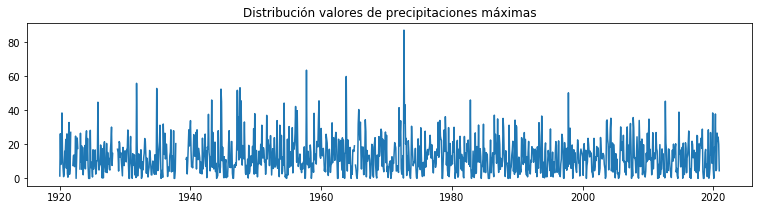

In [35]:
plt.figure(figsize=(13, 3))
plt.title("Distribución valores de precipitaciones máximas")
plt.plot(df['fecha'], df['p_max'])
plt.show()

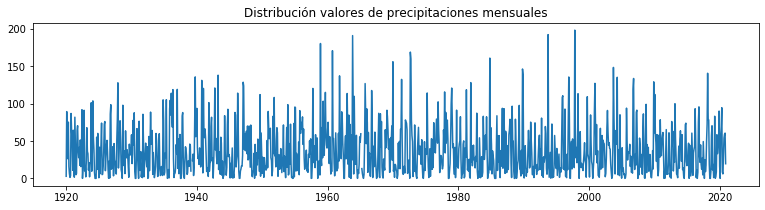

In [36]:
plt.figure(figsize=(13, 3))
plt.title("Distribución valores de precipitaciones mensuales")
plt.plot(df['fecha'], df['p_mes'])
plt.show()

<b>Análisis de valores atípicos y nulos</b>

Llegado a este punto, se analizarán los valores nulos y atípicos del dataset.

El número de valores nulos para las variables son:



In [37]:
print ("Nº de nulos:\n", df[numerical].isnull().sum())

Nº de nulos:
 fecha        0
p_max       30
p_mes        3
n_llu      116
n_tor       30
np_100      30
n_cub      112
hr         168
n_gra      116
n_fog       30
inso       289
q_max       62
q_mar       62
q_med       34
tm_min       7
ta_max       7
ts_min       7
nt_30        7
nv_0050    177
n_des      112
n_nub      112
p_sol      289
np_001      30
ta_min       7
e           76
np_300      30
nv_1000    177
evap       153
nt_00        7
ti_max       7
n_nie      116
tm_mes       7
tm_max       7
nv_0100    177
q_min       62
np_010      30
nw_55      316
nw_91      316
w_rec      346
w_med      176
dtype: int64


Para encontrar valores atípicos, se utilizará el diagrama de caja que ayudará a ver los puntos que quedan fuera del campo de datos.

Se comienza analizando la variable p_max para, posteriormente, seguir con el resto de variables numéricas.

<u> Variable p_max </u>

Text(0, 0.5, 'p_max')

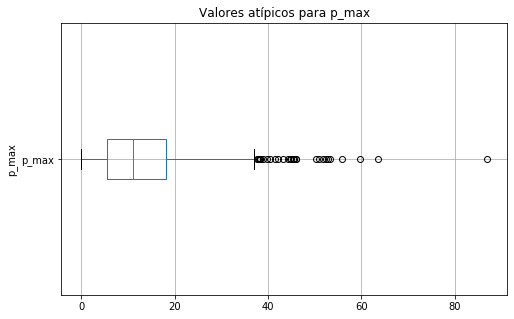

In [38]:
plt.figure(figsize=(8,5))
fig = df.boxplot(column='p_max', vert=False)
fig.set_title('Valores atípicos para p_max')
fig.set_ylabel('p_max')

Se puede observar que existen valores fuera de la caja, por lo que se deberá abordar cómo solucionarlos. Para este trabajo, se ha optado por la corrección de outliers basado en los percentiles IQR.

La limpieza de datos es el primer punto antes del modelado, pero es importante no tener en cuenta información del conjunto de test para tomar ninguna decisión que no le corresponda. El conjunto de test es donde se probará el futuro que no conocemos. Por este motivo, se hará la limpieza de nulos y valores atípicos sobre el conjunto de entrenamiento y validación

In [39]:
train_size = 0.9 # 80% train + 10% validation
# Se divide en train-test para cuando se hagan los cambios no hacerlo sobre el futuro
split = round(df.shape[0]*0.9)
train = df.iloc[:split,:]
test = df.iloc[split:,:]

In [40]:
# Se calculan los estadísticos con train
lower, upp = correct_outlier(train.p_max)
media_train = np.nanmean(train['p_max']) # calcula media de p_max ignorando nan

In [41]:
# Se hace la imputación de missings en train y test, con la media de la columna
train['p_max'].replace(np.nan, media_train, inplace=True) 
test['p_max'].replace(np.nan, media_train, inplace=True) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [42]:
# Se modifican los outliers sólo en train (en test se modificaría el futuro)
train['p_max'] = train['p_max'].apply(lambda x: max(lower, min(x, upp)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Se vuelve a mostrar el diagrama de caja para *p_max*:

Text(0, 0.5, 'p_max')

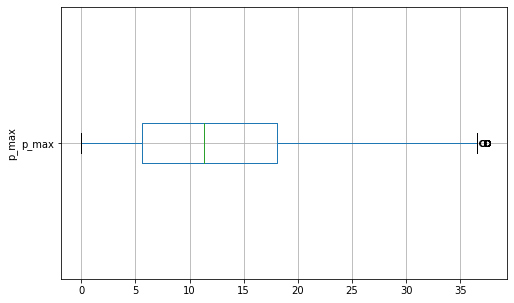

In [43]:
plt.figure(figsize=(8,5))
fig = train.boxplot(column='p_max', vert=False)
fig.set_title('')
fig.set_ylabel('p_max')

In [44]:
print( "Nº de nulos de p_max: ", train["p_max"].isnull().sum())

Nº de nulos de p_max:  0


Por tanto, se han corregido los valores atípicos y NaN para la variable p_max. A continuación, en el siguiente apartado se aplicarán los mismos pasos pero para el resto de variables numéricas.

<u>Resto de variables numéricas</u>

De la misma manera que se ha corregido los outliers para la variable "p_max" se hace para el resto de variables:

In [45]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Hay {} variable(s) numéricas(s): '.format(len(numerical)), numerical)

Hay 40 variable(s) numéricas(s):  ['fecha', 'p_max', 'p_mes', 'n_llu', 'n_tor', 'np_100', 'n_cub', 'hr', 'n_gra', 'n_fog', 'inso', 'q_max', 'q_mar', 'q_med', 'tm_min', 'ta_max', 'ts_min', 'nt_30', 'nv_0050', 'n_des', 'n_nub', 'p_sol', 'np_001', 'ta_min', 'e', 'np_300', 'nv_1000', 'evap', 'nt_00', 'ti_max', 'n_nie', 'tm_mes', 'tm_max', 'nv_0100', 'q_min', 'np_010', 'nw_55', 'nw_91', 'w_rec', 'w_med']


In [46]:
correct_cols = numerical[2:] #se comienza en la columna 2, ya que p_max ya fue corregida anteriormente
print("Variables corregir: ", correct_cols)

Variables corregir:  ['p_mes', 'n_llu', 'n_tor', 'np_100', 'n_cub', 'hr', 'n_gra', 'n_fog', 'inso', 'q_max', 'q_mar', 'q_med', 'tm_min', 'ta_max', 'ts_min', 'nt_30', 'nv_0050', 'n_des', 'n_nub', 'p_sol', 'np_001', 'ta_min', 'e', 'np_300', 'nv_1000', 'evap', 'nt_00', 'ti_max', 'n_nie', 'tm_mes', 'tm_max', 'nv_0100', 'q_min', 'np_010', 'nw_55', 'nw_91', 'w_rec', 'w_med']


In [47]:
for col in range(len(correct_cols)):
    # se calcula los estadísticos con train

    lower, upp = correct_outlier(train[correct_cols[col]])
    media_train = np.nanmean(train[correct_cols[col]]) # se calcula media de p_max ignorando nan
 
    # Se hace la imputación de missings en train y test, con la media de la columna  
    train[correct_cols[col]].replace(np.nan, media_train, inplace=True) 
    test[correct_cols[col]].replace(np.nan, media_train, inplace=True) 
    
    train[correct_cols[col]] = train[correct_cols[col]].apply(lambda x: max(lower, min(x, upp)))
    test[correct_cols[col]] = test[correct_cols[col]].apply(lambda x: max(lower, min(x, upp)))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [48]:
# Por último, tras normalizar, se vuelven a unir los conjuntos de datos 
df = pd.concat((train,test), axis=0)

Después de las modificaciones anteriores, se comprueba de nuevo el nº de nulos de las variables:

In [49]:
print ("Nº de nulos:\n", df[numerical].isnull().sum())

Nº de nulos:
 fecha      0
p_max      0
p_mes      0
n_llu      0
n_tor      0
np_100     0
n_cub      0
hr         0
n_gra      0
n_fog      0
inso       0
q_max      0
q_mar      0
q_med      0
tm_min     0
ta_max     0
ts_min     0
nt_30      0
nv_0050    0
n_des      0
n_nub      0
p_sol      0
np_001     0
ta_min     0
e          0
np_300     0
nv_1000    0
evap       0
nt_00      0
ti_max     0
n_nie      0
tm_mes     0
tm_max     0
nv_0100    0
q_min      0
np_010     0
nw_55      0
nw_91      0
w_rec      0
w_med      0
dtype: int64


In [50]:
display_all(df[1:].describe())

,p_max,p_mes,n_llu,n_tor,np_100,n_cub,hr,n_gra,n_fog,inso,q_max,q_mar,q_med,tm_min,ta_max,ts_min,nt_30,nv_0050,n_des,n_nub,p_sol,np_001,ta_min,e,np_300,nv_1000,evap,nt_00,ti_max,n_nie,tm_mes,tm_max,nv_0100,q_min,np_010,nw_55,nw_91,w_rec,w_med
count,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.0,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.0,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.0,1211.000000,1211.000000,1211.000000,1211.000000,1211.0,1211.000000,1211.000000,1211.0,1211.000000,1211.000000,1211.000000,1211.0,1211.000000,1211.000000
mean,12.839468,35.478769,8.199305,0.959973,1.094602,6.560699,58.131291,0.0,1.878903,7.697133,950.551836,1017.281290,940.752319,9.502947,25.383538,14.379596,3.723889,0.0,8.730525,15.012838,61.312434,7.623482,4.224412,97.374116,0.0,0.666992,901.708743,1.096486,12.706658,0.0,14.488839,19.441435,0.0,927.900566,5.188051,2.210056,0.0,202.522495,8.329089
std,9.321157,30.923967,4.919175,1.384130,1.314441,4.542110,12.688756,0.0,2.659453,2.391949,3.902949,3.923226,2.944003,5.846190,8.056257,5.648710,5.850024,0.0,5.268675,3.865914,13.131918,4.970159,5.923008,24.795218,0.0,0.906405,513.208495,1.859401,7.320127,0.0,6.811236,7.848198,0.0,6.447764,3.803400,1.941340,0.0,33.047646,2.588160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.0,0.000000,1.400000,940.900000,1006.900000,933.650000,-2.600000,9.900000,3.600000,0.000000,0.0,0.000000,4.000000,18.000000,0.000000,-10.100000,37.000000,0.0,0.000000,83.000000,0.000000,-3.000000,0.0,1.900000,5.600000,0.0,910.000000,0.000000,0.000000,0.0,109.500000,2.500000
25%,5.500000,10.300000,4.000000,0.000000,0.000000,3.000000,48.000000,0.0,0.000000,6.150000,947.700000,1014.500000,939.000000,4.600000,18.000000,9.600000,0.000000,0.0,5.000000,12.000000,55.000000,4.000000,-0.600000,77.000000,0.0,0.000000,469.000000,0.000000,6.800000,0.0,8.400000,12.150000,0.0,924.100000,2.000000,1.000000,0.0,185.000000,7.000000
50%,11.400000,27.900000,8.000000,0.000000,1.000000,6.687563,58.321392,0.0,0.000000,7.694908,950.100000,1016.500000,940.800000,8.700000,25.209133,13.700000,0.000000,0.0,8.630940,15.000000,61.302275,7.000000,3.400000,96.803343,0.0,0.000000,884.809072,0.000000,11.400000,0.0,13.700000,18.700000,0.0,928.400000,5.000000,2.390089,0.0,206.365918,8.000000
75%,18.100000,53.400000,11.000000,1.050895,2.000000,9.000000,67.000000,0.0,3.000000,9.100000,953.200000,1019.450000,942.300000,14.900000,33.000000,19.600000,7.000000,0.0,12.000000,18.000000,69.500000,11.000000,9.500000,116.000000,0.0,1.227273,1194.000000,1.977860,18.400000,0.0,20.700000,26.500000,0.0,932.800000,8.000000,3.000000,0.0,213.000000,9.000000
max,45.300000,117.162500,24.000000,5.000000,5.000000,20.500000,88.000000,0.0,7.500000,13.600000,962.100000,1027.500000,947.650000,22.900000,40.700000,25.900000,15.000000,0.0,24.000000,26.000000,92.000000,21.500000,19.600000,176.000000,0.0,2.500000,2496.750000,5.000000,31.200000,0.0,29.800000,36.600000,0.0,946.800000,17.000000,7.500000,0.0,297.500000,14.500000


### Relación entre variables

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1311
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   fecha    1212 non-null   datetime64[ns]
 1   p_max    1212 non-null   float64       
 2   p_mes    1212 non-null   float64       
 3   n_llu    1212 non-null   float64       
 4   n_tor    1212 non-null   float64       
 5   np_100   1212 non-null   float64       
 6   n_cub    1212 non-null   float64       
 7   hr       1212 non-null   float64       
 8   n_gra    1212 non-null   float64       
 9   n_fog    1212 non-null   float64       
 10  inso     1212 non-null   float64       
 11  q_max    1212 non-null   float64       
 12  q_mar    1212 non-null   float64       
 13  q_med    1212 non-null   float64       
 14  tm_min   1212 non-null   float64       
 15  ta_max   1212 non-null   float64       
 16  ts_min   1212 non-null   float64       
 17  nt_30    1212 non-null   float64 

In [52]:
print('El tamaño del dataset es:', df.size, ".\nTiene: ", df.shape[0], " filas y ", df.shape[1], " columnas.")

El tamaño del dataset es: 48480 .
Tiene:  1212  filas y  40  columnas.


A continuación, se analizará qué variables están relacionadas entre sí con la matriz de correlación

El resultado de la matriz de correlación puede ser un valor entre -1 y 1. Cuando el valor se encuentre más cerca de estos valores extremos, más fuerte será la relación entre las variables. En el mapa de color se van mostrando en color más rosáceo las variables fuertemente correlacionadas y en azul las que menos.

A continuación, se muestra el mapa de calor de la correlación de las variables:

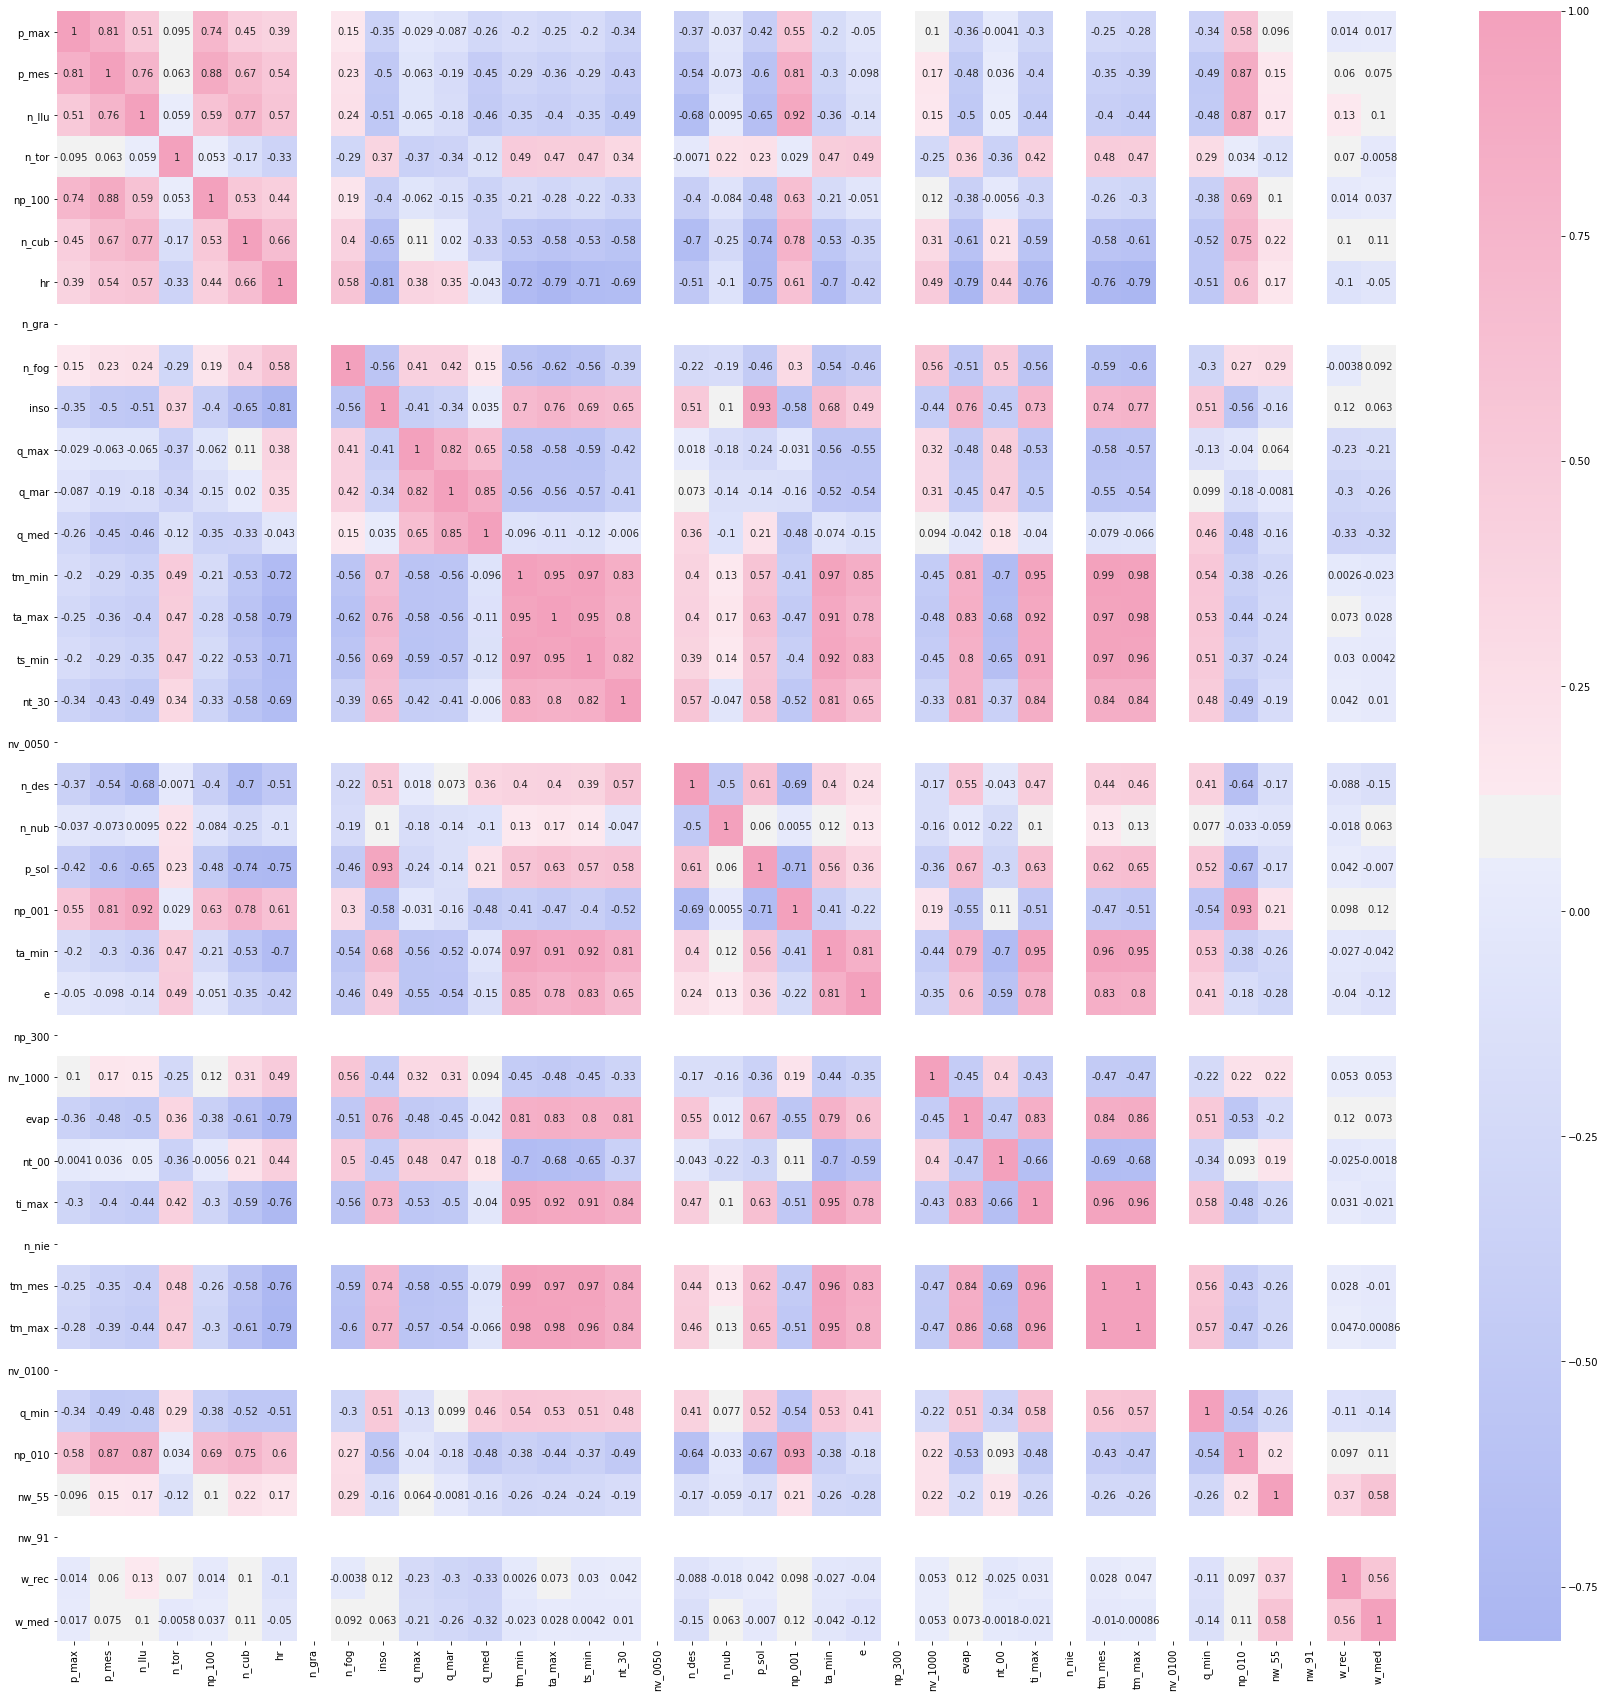

In [53]:
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=80, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(30,30))
sns.heatmap(corrmat,cmap= cmap,annot=True)

Se puede observar que existen variables (n_gra, nv_0050, np_300, n_nie, nv_0100, nw_91) que para todas las observaciones su valor es 0, por lo que se procede a eliminarlas.

In [54]:
df = df.drop(columns=["n_gra", "nv_0050", "np_300", "n_nie", "nv_0100", "nw_91"], axis=1) # Se eliminan 

Se vuelve a mostrar la matriz de correlación:

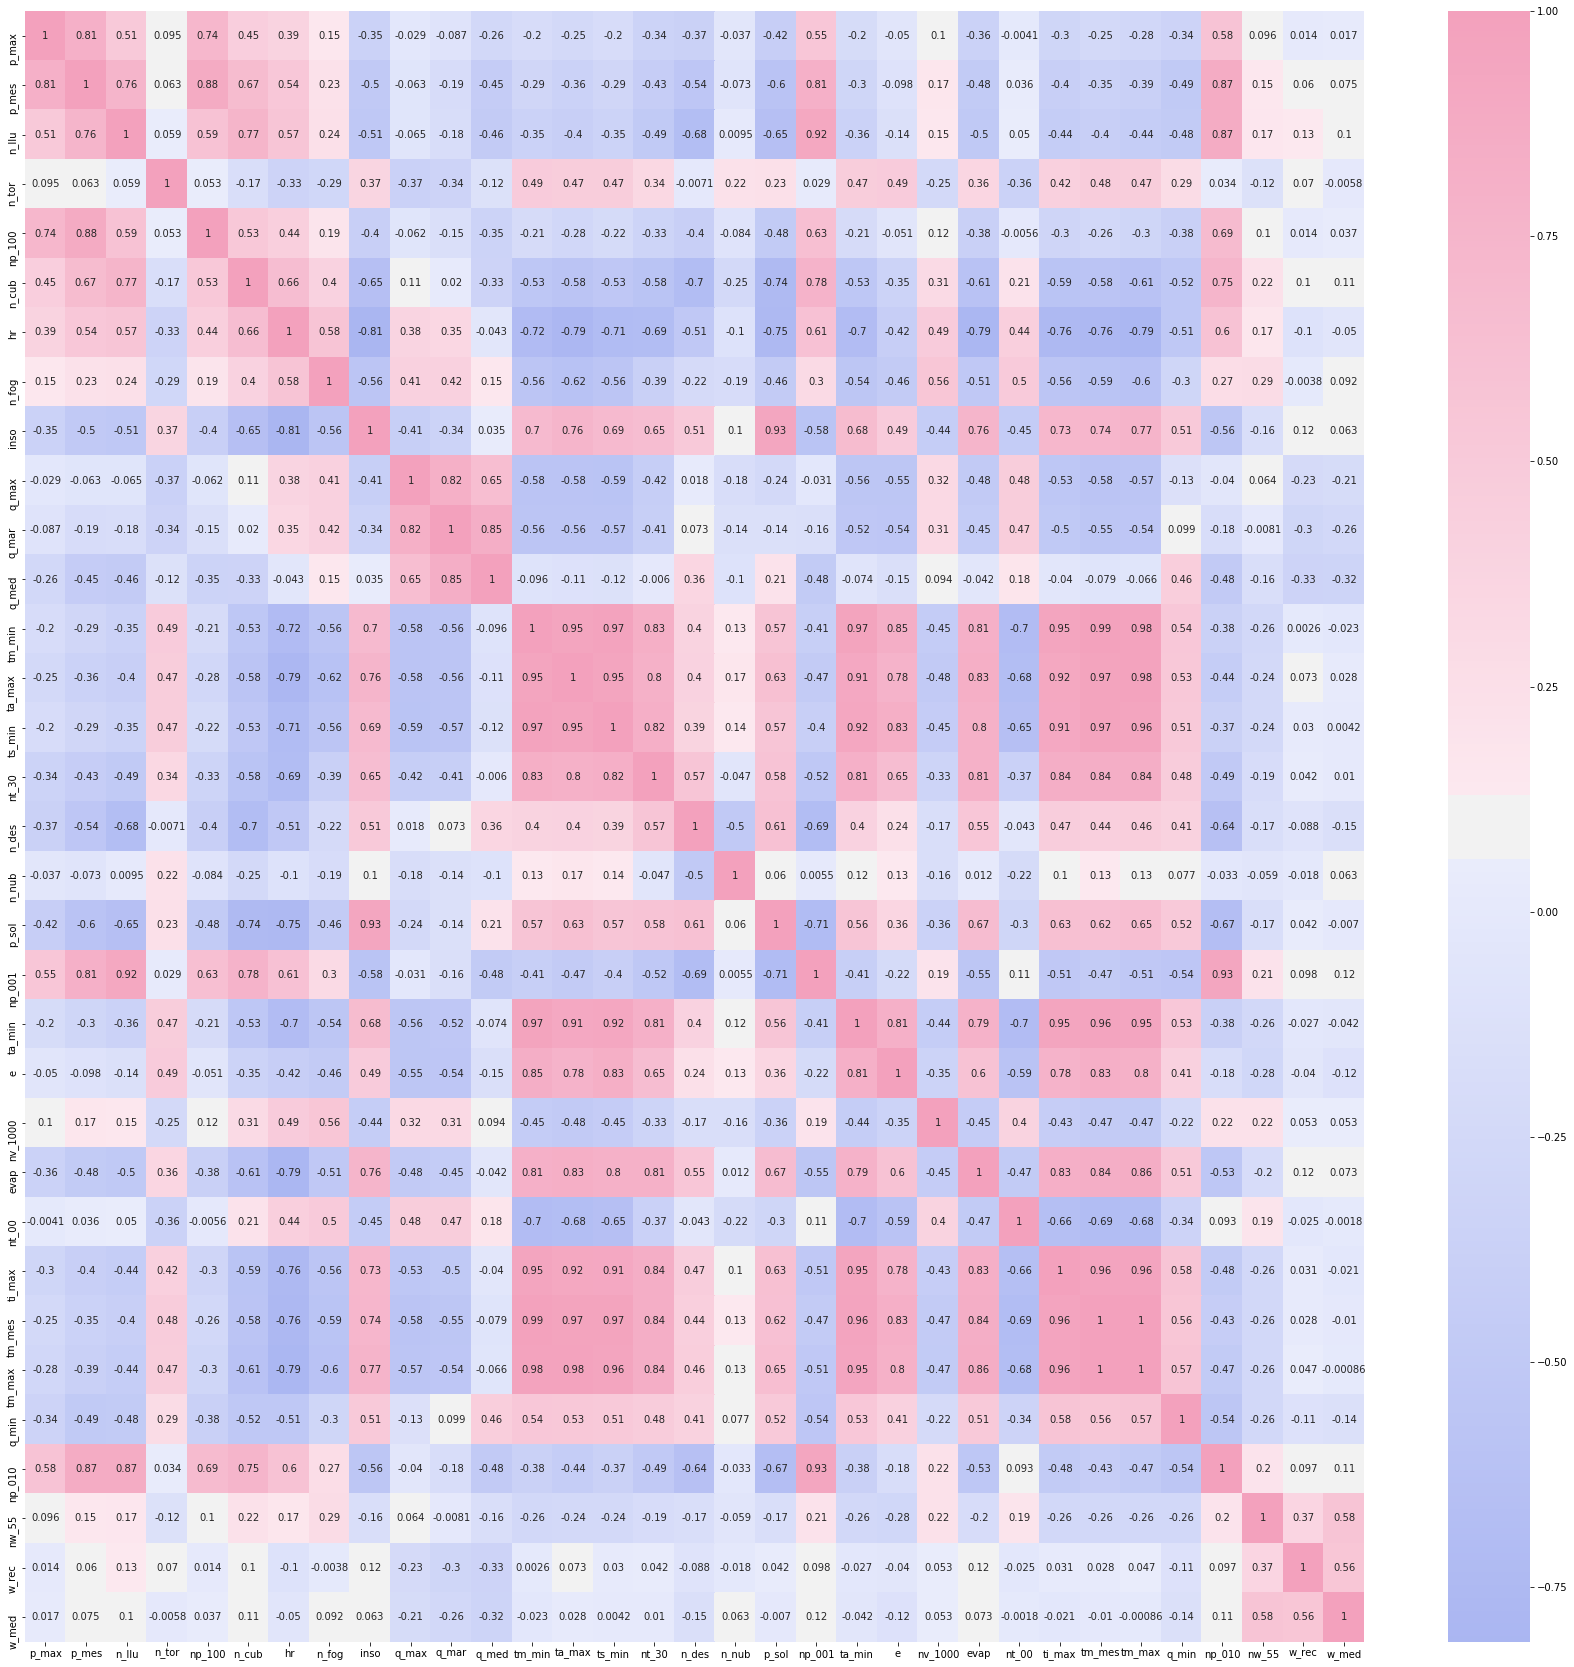

In [55]:
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=80, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(30,30))
sns.heatmap(corrmat,cmap= cmap,annot=True)

Como resultado del gráfico anterior, se puede observar que:

* no existen relaciones inversas (valores cercanos a -1)
* existen variables con una correlación alta (superior a 0.70). Como, por ejemplo: 
     * la variable "pmax" y "p_mes" con un valor de 0.81
     * la variable "p_max" y "np_100" con un valor de 0.74
     * la variable "n_llu" y "np_001" con un valor de 0.92
     * la variable "n_llu" y "np_010" con un valor 0.87




Se eliminan algunas variables que tienen una correlación mayor a 0.7


In [56]:
df = df.drop(columns=["p_mes", "np_100", "np_001", "np_010", "tm_min", "ta_max", "ti_max", "tm_mes"], axis=1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1311
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   fecha    1212 non-null   datetime64[ns]
 1   p_max    1212 non-null   float64       
 2   n_llu    1212 non-null   float64       
 3   n_tor    1212 non-null   float64       
 4   n_cub    1212 non-null   float64       
 5   hr       1212 non-null   float64       
 6   n_fog    1212 non-null   float64       
 7   inso     1212 non-null   float64       
 8   q_max    1212 non-null   float64       
 9   q_mar    1212 non-null   float64       
 10  q_med    1212 non-null   float64       
 11  ts_min   1212 non-null   float64       
 12  nt_30    1212 non-null   float64       
 13  n_des    1212 non-null   float64       
 14  n_nub    1212 non-null   float64       
 15  p_sol    1212 non-null   float64       
 16  ta_min   1212 non-null   float64       
 17  e        1212 non-null   float64 

In [57]:
print('El tamaño del dataset es:', df.size, ".\nTiene: ", df.shape[0], " filas y ", df.shape[1], " columnas.")

El tamaño del dataset es: 31512 .
Tiene:  1212  filas y  26  columnas.


## Exportación de los datos

Por último, exportamos a un fichero CSV los datos que han sido limpiados para poder procesarlos posteriormente.

In [58]:
df.to_csv("data/data_clean_3195.csv", index=False, header=True)